# 설정

In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

* 군집(Cluestering)  
    비슷한 샘플을 클러스터로 모은다. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있는 훌륭한 도구
* 이상치 탐지(Outlier detection)  
    '정상'데이터가 어떻게 보이는지를 학습한다. 그다음 비정상 샘플을 감지하는 데 사용한다. 예를 들면 제조 라인에서 결함 제품을 감지하거나 시계열 데이터에서 새로운 트렌드를 찾는다.
* 밀도 추정(density estimation)  
    데이터셋 생성 확률 과정의 확률 밀도 함수를 추정한다. 밀도추정은 이상치 탐지에 널리 사용된다. 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높다.

# 군집
* 비슷한 샘플을 구별해 하나의 **클러스터** 또는 비슷한 샘플의 그룹으로 할당하는 것. 분류와 마찬가지로 각 샘플은 하나의 그룹에 할당된다.

**소개 - 분류 vs 군집**

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

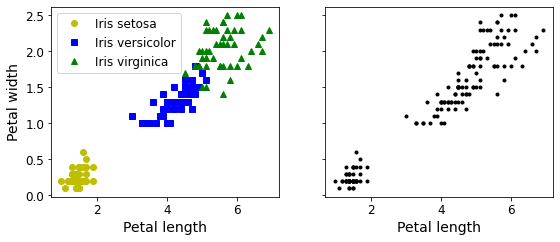

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

가우시안 혼합 모델은 3개의 클러스터를 잘 나눌 수 있습니다(꽃잎 길이와 너비, 꽃받침 길이와 너비 4개의 특성을 모두 사용합니다).

### 군집을 활용한 애플리케이션
* 고객분류  
고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모을 수 있다. 이는 고객이 누구인지, 고객이 무엇을 원하는지 이해하는데 오두이 된다. 고객 그룹마다 제품 추천이나 마케팅 전력을 다르게 적용할 수 있다. 예를 들어 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천 시스템(recommender system)을 만들 수 있다.  <br>
<br>
* 데이터분석  
새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 된다.    <br>
<br>
* 차원 축소 기법  
한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성(affinity)를 측정할 수 있다. (친화성은 샘플이 클러스터에 얼마나 잘 맞는지 측정한다.) 각 샘플의 특성 벡터 x는 클러스터 친화성의 벡터로 바꿀 수 있다. k개의 클러스터가 있다면 이 벡터는 k차원이 된다. 이 벡터는 일반적으로 원본 특성보다 훨씬 저 차원이다. 하지만 이후 분석을 위한 충분한 정보를 가질 수 있다.    <br>
<br>
* 이상치 탐지  
모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. 웹사이트 내 행동을 기반으로 사용자의 클러스터를 만들었다면 초당 웹서버 요청을 비정상적으로 많이 하는 사용자를 감지할 수 있다. 이상치 탐지는 특히 제조 분야에서 결함을 감지할 때 유용하다. 또는 부정 거래 감지(fraud detection)에 활용 된다.<br>
<br>
* 준지도 학습  
레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있다. 이 기법은 이어지는 지도 학습 알고리즘에 필요한 레이블이 크게 증가해 성능을 크게 향상한다.  <br>
<br>  
* 검색 엔진  
일부 검색 엔진은 제시된 이미지와 비슷한 이미지를 찾아준다. 이런 시스템을 구축하려면 먼저 데이터 베이스에 있는 모든 이미지에 군집 알고리즘을 적용해야한다. 비슷한 이미지는 동일한 클러스터에 속한다. 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾는다. 그 다음 이 클러스터의 모든 이미지를 반환한다.  <br>
<br>
* 이미지 분할  
색을 기반으로 픽셀을 클러스터로 모든다. 그 다음 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다. 이는 이미지에 있는 색상의 종류를 크게 줄인다. 이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 이미지 분할을 많이 활용한다.

In [5]:
# 가우시안 혼합 모델을 활용한 군집화
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [7]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

In [8]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

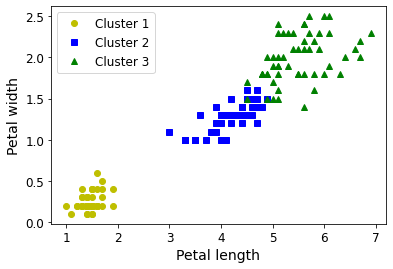

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [10]:
np.sum(y_pred==y)

145

In [11]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

# k-평균

**<그림 9-2> 샘플 덩어리 다섯 개로 이루어진 레이블이 없는 데이터셋**

In [12]:
# 예제데이터 생성
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [13]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [14]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

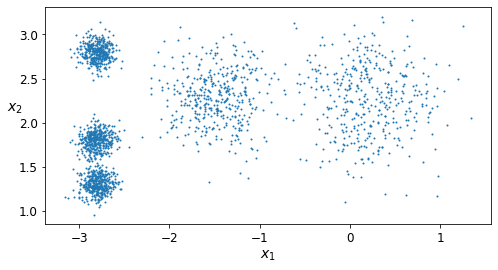

In [15]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

**훈련과 예측**

이 데이터셋에 K-평균 군집 알고리즘을 훈련해 보겠습니다. 이 알고리즘은 클러스터 중심을 찾고 각 샘플을 가까운 클러스터에 할당합니다

In [18]:
from sklearn.cluster import KMeans
# 각 샘플을 5개의 클러스터 중 하나에 할당
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [19]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [20]:
y_pred is kmeans.labels_

True

In [22]:
# 5개의 센트로이드(각 클러스터의 중심) 확인
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

KMeans 객체는 훈련한 샘플의 레이블을 가지고 있습니다. 조금 혼동스럽지만 여기에서 샘플의 레이블 은 샘플에 할당한 클러스터의 인덱스입니다

In [24]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [25]:
# 새로운 샘플의 레이블을 예측 <= 가장 가까운 클러스터를 할당
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

**<그림 9-3> k-평균의 결정 경계 (보로노이 다이어그램)**

In [26]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

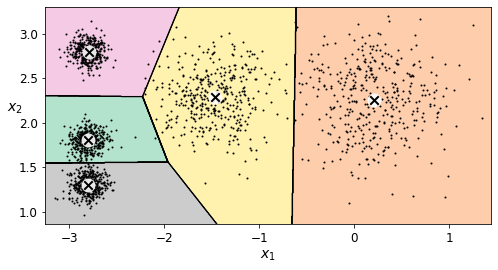

In [27]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

경계 근처에 있는 일부 샘플은 아마도 잘못 클러스터에 할당된 것 같다. 하지만 전반적으로 아주 좋은 것 같다.

### 하드 군집 vs 소프트 군집
* 하드 군집은 각 샘플에 대해 가장 가까운 클러스터를 선택한다.

In [28]:
# transform() 메서드는 샘플과 각 센트로이드 사이의 거리를 반환한다.
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [31]:
# 이 거리가 샘플과 센트로이드 사이의 유클리드 거리인지 확인할 수 있다.
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### k-평균 알고리즘
k-평균 알고리즘은 가장 빠르고 가장 간단한 군집 알고리즘 중 하나이다:
* 먼저 k개의 센트로이드를 랜덤하게 초기화한다: 데이터셋에서 k개의 샘플을 랜덤하게 선택하고 센트로이드를 그 위치에 놓는다.
* 수렴할 때까지 다음을 반복 (센트로이드가 더이상 이동하지 않을 때까지):
    - 각 샘플을 가장 가까운 센트로이드에 할당
    - 세트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트한다.

In [32]:
# K-평균 알고리즘을 1, 2, 3회 반복하고 센트로이드가 어떻게 움직이는지 확인
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

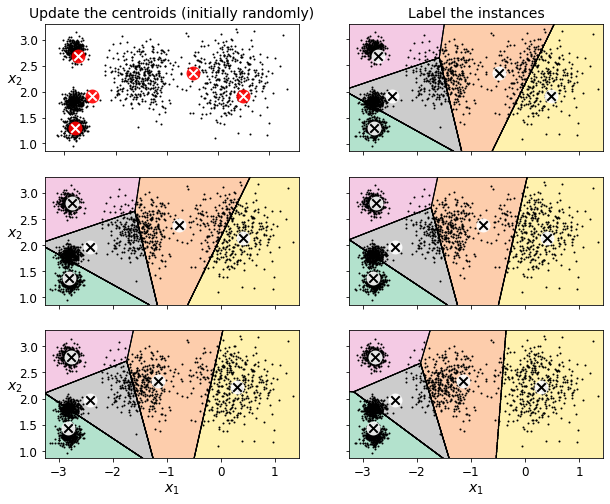

In [33]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### k-평균의 변동선
원래 k-평균 알고리즘에서는 센트로이드가 그냥 랜덤하게 초기화되고 알고리즘은 단순히 한번씩 반복하여 앞서 본 것처럼 점차 센트로이드를 개선시키다.  
<br>
하지만 이방식의 문제점은 k-평균을 여러번 (또는 다른 랜덤 시드로) 실행하면 아래에서 보듯이 매우 다른 결과를 얻는다.

In [34]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

그림 저장: kmeans_variability_plot


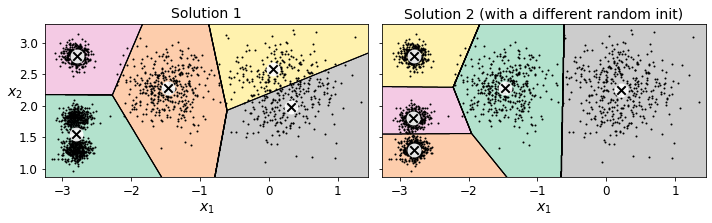

In [35]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

이 문제는 센트로이드 초기화를 개선하여 이런 위험을 줄일 수 있다.

### 이너셔
최선의 모델을 선택하려면 K-평균 모델의 성능을 평가할 방법이 있어야 합니다. 안타깝지만 군집은 비지도 학습이기 때문에 타깃이 없습니다. 하지만 적어도 각 샘플과 센트로이드 사이의 거리는 측정할 수 있습니다. 이것이 이너셔 지표의 아이디어입니다:

In [37]:
kmeans.inertia_

211.59853725816836

In [38]:
# 이너셔는 각 훈련 샘플과 가장 가까운 센트로이드 사이의 제곱 거리의 합으로 쉽게 검증
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [39]:
# score() 메서드는 음의 이너셔를 반환. 왜 음수일까? 사이킷런의 score() 메서드는 항상 " 큰 값이 좋은 것 " 규칙을 따라야 하기 때문
kmeans.score(X)

-211.59853725816834

### 다중 초기화
변동성 이슈를 해결하는 한 방법은 단순히 k-평균 알고리즘을 랜덤 초기화를 다르게 하여 여러 번 실행하고 가장 작은 이너셔를 만드는 솔루션을 선택한다. 예를 들어 앞선 그림에 있는 엉터리 모델 두 개의 이너셔는 다음과 같다.

In [42]:
kmeans_rnd_init1.inertia_

219.4353944277139

In [45]:
kmeans_rnd_init2.inertia_

211.59853725816836

n_init 매개변수를 지정하면 사이킷런은 원래 알고리즘을 n_init 번 실행하고 이너셔가 가장 작은 솔루션을 선택합니다. 이 매개변수의 기본값은 n_init=10입니다.

In [48]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

여기에서 볼 수 있듯이 결국 처음 만들었던 모델을 얻었습니다. 이 모델이 최적의 K-평균 결과로 보입니다(
라고 가정하고 이너셔를 기준으로 했을 때입니다).

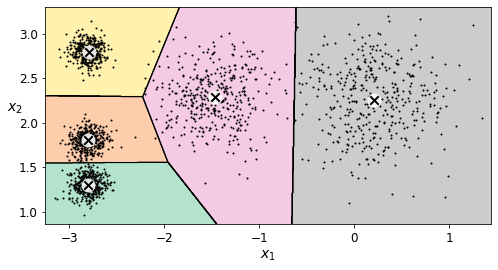

In [50]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### 센트로이드 초기화 방법
k-평균++ 알고리즘은 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계를 소개한다.  
이 방법은 k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춘다.  
k-평균++ 초기화를 사용하려면 간단하게 init="k-means++"로 지정하면 된다. (사실 이 값이 기본값이다)

In [51]:
KMeans()

KMeans()

In [52]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### k-평균 속도 개선
K-평균 알고리즘은 불필요한 거리 계산을 많이 피하는 식으로 속도를 크게 높일 수 있다. 이를 위해 삼각 부등식을 사용한다(3개의 포인트 A, B, C가 있을 때, 거리 AC는 항상 AC ≤ AB + BC를 만족함). 그리고 샘플과 센트로이드 사이 거리의 최솟값과 최댓값을 유지한다.

Elkan의 K-평균 방식을 사용하려면 algorithm="elkan"으로 설정. 이 방법은 희소 행렬을 지원하지 않는다. 따라서 사이킷런은 밀집 배열에는 "elkan"을 사용하고 희소 행렬에는 (기본 K-평균 알고리즘인) "full을 사용

In [53]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

133 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [54]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

894 ms ± 28.9 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### 미니배치 k-평균

In [55]:
# 사이킷런은 미니배치를 지원하는 K-평균 방식도 제공한다
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [56]:
minibatch_kmeans.inertia_

211.65239850433193

데이터셋이 메모리에 다 들어가지 못하면 가장 간단한 방법은 이전 장의 점진적 PCA에서 했던 것처럼 memmap 클래스를 사용하는 것입니다. 먼저 MNIST 데이터를 로드합니다:

In [59]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [61]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [62]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

In [63]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [64]:
np.random.seed(42)

In [65]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\Prog

In [66]:
best_kmeans.score(X)

-211.6257187889114

미니배치 K-평균이 일반 K-평균보다 훨씬 빠르다.

In [67]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

80.7 ms ± 6.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

556 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


미니배치 K-평균과 일반 K-평균 사이에 이너셔와 훈련 시간을 그래프로 나타내 보자

In [69]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

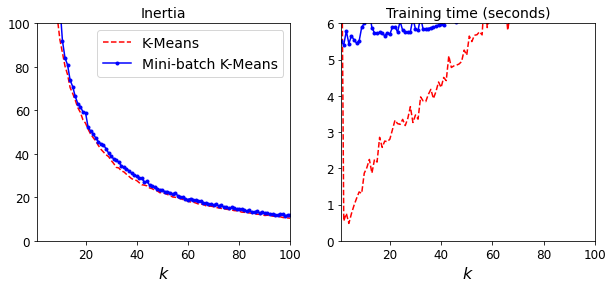

In [70]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

### 최적의 클러스터 찾기

클러스터 개수가 5보다 작거나 크게 지정하면 어떨까요?

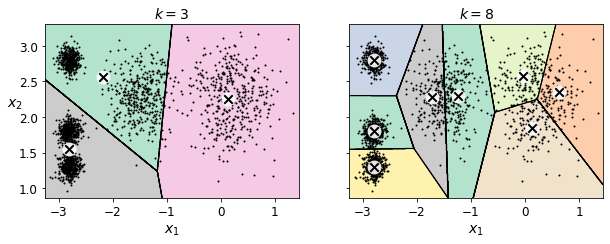

In [71]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

이너셔 확인

In [72]:
kmeans_k3.inertia_

653.2167190021551

In [73]:
kmeans_k8.inertia_

119.11983416102876

k가 증가할수록 이너셔가 줄어들기 때문에 단순히 이너셔가 작은 k를 선택할 수 없다. 실제 클러스터가 많을수록 샘플은 인접한 센트로이드에 더 가깝다. 따라서 이너셔가 더 작습니다. 하지만 k에 대한 이너셔를 그래프로 그리고 결과 그래프를 조사해 볼 수 있다:

In [74]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

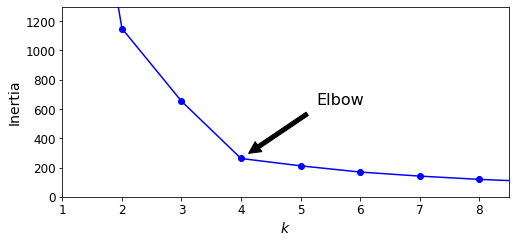

In [75]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

여기에서 볼 수 있듯이 k=4에서 엘보우가 있습니다. 이 값보다 클러스터가 작으면 나쁘다는 뜻입니다. 이보다 더 많으면 크게 도움이 되지 않고 배로 늘려도 그렇습니다. 따라서 k=4가 아주 좋은 선택입니다. 물론 이 예제에서는 이 값이 완벽하지 않습니다. 왼쪽 아래 두 클러스터가 하나의 클러스터로 간주되었지만 꽤 좋은 군집 결과입니다.

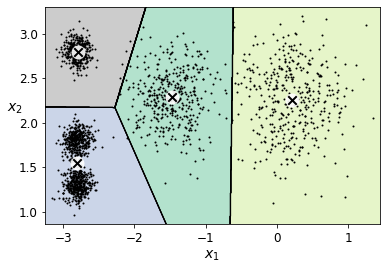

In [76]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

* 엘보우 그래프보다 더 정확한 방법은 **실루엣 점수**이다. 이 값은 모든 샘플에 대한 **실루엣 계수**의 평균이다. 샘플의 실루엣 계수는 $(b-a)/max(a,b)$로 계산한다. 여기서 a는 동일한 클러스터에 있는 다른 샘플까지 평균 거리이다(클러스터 내부의 평균 거리). b는 가장 가까운 클러스터(샘플 자신의 클러스터를 제외하고  b를 최소화하는 클러스터)까지 평균 거리이다.  
실루엣 계수는 -1에서 +1사이 값을 가진다. +1에 가까우면 샘플이 다른 클러스터로부터 떨어져 자신의 클러스터 안에 잘 있다는 것을 의미합니다.0에 가까우면 클러스터 경계에 가깝다는 의미입니다. -1에 가까우면 샘플이 잘못된 클러스터에 할당되었을지 모릅니다.

In [77]:
# k에 대한 실루엣 점수를 그래프로 그려보자
from sklearn.metrics import silhouette_score

In [78]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [79]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

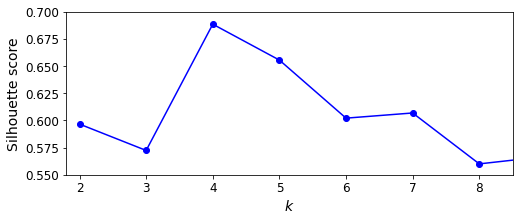

In [80]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

여기에서 볼 수 있듯이 이 그래프는 이전보다 정보가 더 풍부합니다. 특히 k=4가 매우 좋은 선택이지만 k=5도 꽤 괜찮은 선택이라는 것을 보여줍니다. 특히 k=6 이나 7보다 훨씬 좋다. 이너셔를 비교했을 때는 드러나지 않은 정보이다.

모든 샘플의 실루엣 계수를 할당된 클러스터와 실루엣 값으로 정렬하여 그리면 훨씬 많은 정보를 얻을 수 있습니다.   
이를 **실루엣 다이어그램** 이라고 합니다:

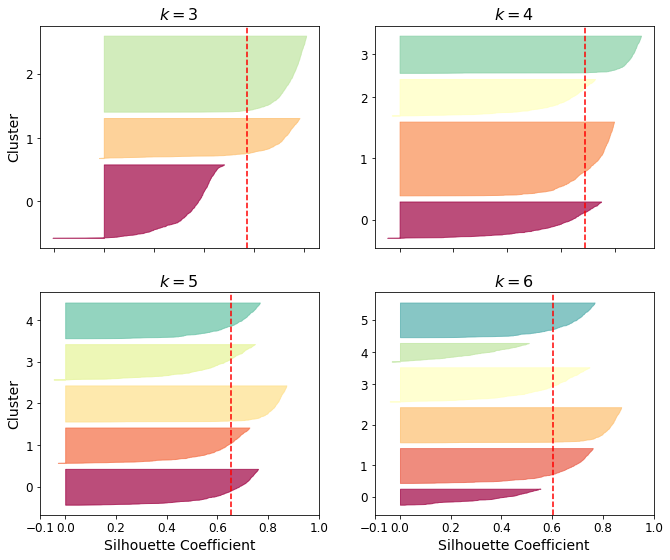

In [81]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

여기에서 볼 수 있듯이 k=5가 가장 좋은 선택입니다. 모든 클러스터의 크기가 거의 동일하고 평균 실루엣 점수를 나타내는 파선을 모두 넘었습니다.

## k-평균의 한계
* 최적인 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 함.
* 클러스터 개수를 지정해야 함
* 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다.

In [82]:
# 크기, 밀집도, 방향이 다른 세 개의 타원형 클러스터를 가진 데이터셋
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

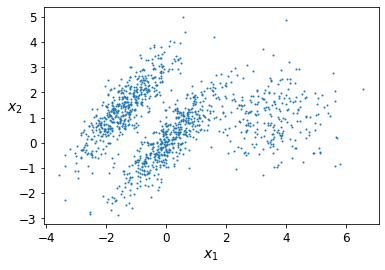

In [83]:
plot_clusters(X)

In [84]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

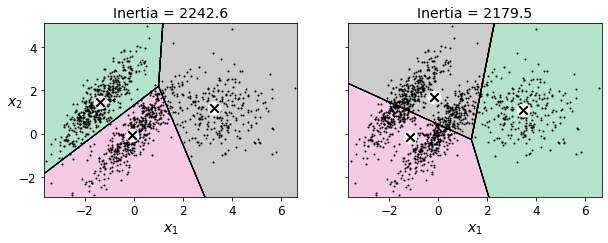

In [85]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

## 군집을 사용한 이미지 분할

In [86]:
# 무당벌레 이미지를 다운로드합니다
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x2c0745dfcd0>)

In [87]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [88]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [89]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

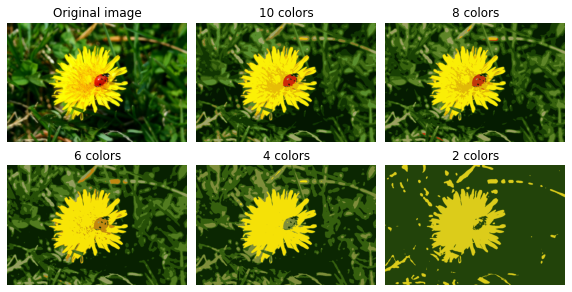

In [90]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## 군집을 사용한 전처리
* 군집은 차원 축소에 효과적인 방법이다. 특히 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있다.

In [92]:
# 차원 축소에 군집을 사용하는 예
# MNIST와 유사하게 숫자 0에서 9까지 8x8 흑백 이미지 1,797개로 이루어진 숫자 데이터셋 을 다루어 보자..
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [94]:
# 로지스틱 회귀 모델을 훈련하고 테스트 세트에서 평가
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [95]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

이제 K-평균을 전처리 단계로 사용해 더 향상할 수 있는지 알아 보죠. 훈련 세트를 50개의 클러스터로 만들고 이미지를 이 클러스터까지 거리로 바꾼 다음 로지스틱 회귀 모델을 적용하는 파이프라인을 만듭니다:

In [100]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [101]:
pipeline.score(X_test, y_test)

0.98

오차율을 35%나 줄였습니다! 하지만 클러스터 개수 k를 임의로 결정했습니다. 이 보다 더 나은 방법이 있겠죠. K-평균을 분류 파이프라인에서 전처리 단계로 사용했기 때문에 좋은 k값을 찾는 것은 이전보다 더 쉽습니다. 실루엣 분석을 수행하거나 이너셔를 최소화할 필요가 없습니다. 가장 좋은 k값은 가장 좋은 분류 성능을 내는 것입니다. 즉, GridSearchCV를 사용해 최적의 클러스터 개수를 찾아보자

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.5s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   4.4s
[CV] END ..............................kmeans__n_clusters=36; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=36; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=36; total time=   4.6s
[CV] END ..............................kmeans__n_clusters=37; total time=   4.8s
[CV] END ..............................kmeans__n_clusters=37; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=37; total time=   4.7s
[CV] END ..............................kmeans__n_clusters=38; total time=   4.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   5.0s
[CV] END ..............................kmeans__n_clusters=38; total time=   4.4s
[CV] END ..............................kmeans__n_clusters=39; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=39; total time=   4.5s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   5.7s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.6s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.9s
[CV] END ..............................kmeans__n_clusters=70; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.6s
[CV] END ..............................kmeans__n_clusters=71; total time=   5.7s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.7s
[CV] END ..............................kmeans__n_clusters=72; total time=   5.1s
[CV] END ..............................kmeans__n_clusters=72; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=72; total time=   5.5s
[CV] END ..............................kmeans__n_clusters=73; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=73; total time=   5.4s
[CV] END ...................

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [105]:
# 최고의 k값 확인
grid_clf.best_params_

{'kmeans__n_clusters': 98}

In [106]:
grid_clf.score(X_test, y_test)

0.9755555555555555

## 군집을 사용한 준지도 학습
* 군집의 또 다른 사용처는 레이블이 없는 샘플이 많고 레이블이 있는 샘플이 적을 때 사용하는 준지도 학습입니다.

In [107]:
# 레이블을 가진 샘플이 50개만 있을 때 로지스틱 회귀 모델의 성능을 확인해 보죠:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

당연히 이전보다 훨씬 낮네요. 어떻게 더 향상할 수 있는지 알아 보겠습니다. 먼저 훈련 세트를 클러스터 50개로 군집합니다. 그다음 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾습니다. 이 이미지를 대표 이미지라고 부르겠습니다:

In [108]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

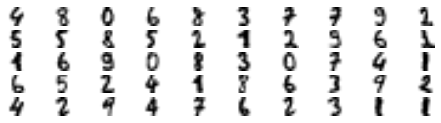

In [109]:
# 대표이미지 시각화
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [110]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [111]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

이 데이터셋은 레이블이 있는 샘플이 50개뿐이지만 완전히 랜덤한 샘플이 아니라 각 샘플은 클러스터의 대표 이미지입니다. 성능이 더 나은지 확인해 보죠:

In [112]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.09555555555555556

하지만 더 향상시킬 수 있습니다. 이 레이블을 같은 클러스터에 있는 다른 모든 샘플에 전파하면 어떨까? = **레이블 전파**

In [113]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [114]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [115]:
log_reg.score(X_test, y_test)

0.15333333333333332

In [116]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [117]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [118]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [119]:
log_reg.score(X_test, y_test)

0.15555555555555556

In [120]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.18900343642611683

* 능동학습(active learning)

    전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청할때 특정 샘플의 레이블 제공

    불확실성 샘플링(uncertainty sampling)

  1. 지금까지 수집한 레이블된 샘플에서 모델을 훈련, 이 모델을 사용해 레이블 되지 않은 모든 샘플에 대한 예측을 만든다.
  2. 모델이 가장 불확실하게 예측한 샘플(주 추정 확률이 낮은 샘플)을 전문가에게 보내 레이블을 붙인다.
  3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때 까지 이를 반복

## DBSCAN
이 알고리즘은 밀집된 연속적 지역을 클러스터로 정의한다. 작동 방식은 다음과 같다.
* 알고리즘이 각 샘플에서 작은 거리인 앱실론 내에 샘플이 몇개 놓여있는지 센다. 이 지역을 샘플의 앱실론-이웃 이라고 부른다.

* (자기자신을 포함해) 앱실론- 이웃 내에 적어도 min_samples개 샘플이 있다면 핵심샘플(core instance)로 간주, 즉 핵심 샘플은 밀집된 지역에 있는 샘플이다.

* 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다. 이웃에는 다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.

* 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단  

이 알고리즘은 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 낸다.

In [121]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [122]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [123]:
# 샘플의 레이블 확인
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [124]:
len(dbscan.core_sample_indices_)

808

In [125]:
# 핵심 샘플의 인덱스 확인
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [126]:
# 핵심 샘플 자체데이터 확인
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [127]:
# -1 값은 이상치값
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [128]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [129]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

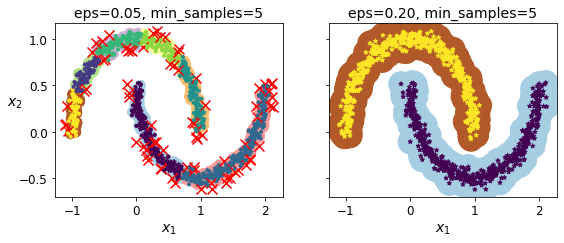

In [130]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [131]:
dbscan = dbscan2

DBSCAN클래스는 predict()메서드를 제공하지 않고 fit_predict()메서드를 제공한다.  
이 알고리즘은 새로운 샘플에 대해 클러스터를 예측할 수 없음.  
따라서 사용자가 필요한 예측기를 선택해야함. 예들 들어 k이웃분류를 훈련해보자

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [134]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [135]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

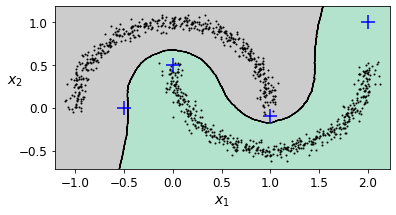

In [136]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

In [137]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

* DBSCAN은 매우 간단하지만 강력한 알고리즘이다. 클러스터의 모양과 개수에 상관없이 감지할 수 있다.
* 이상치에 안정적이고 하이퍼파라미터(eps, min_samples)가 두개 뿐이다.
* 하지만 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능하다.

### 다른 군집 알고리즘

**스펙트럼 군집**

In [138]:
from sklearn.cluster import SpectralClustering

In [139]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [140]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [141]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [142]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

C:\Users\hoseop\AppData\Local\Temp\ipykernel_4836\2175278809.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)


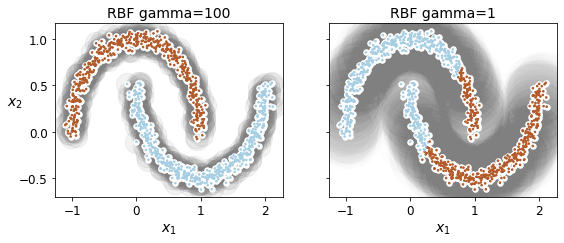

In [143]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

**병합 군집**

In [144]:
from sklearn.cluster import AgglomerativeClustering

In [145]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [146]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [147]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [148]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# 가우시안 혼합
* 가우시안 혼합 모델(GMM)은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델이다.
* 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성한다.
* 일반적으로 클러스터는 타원형이다.

In [149]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [150]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

알고리즘이 추정한 파라미터 확인

In [151]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [152]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [153]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [154]:
# 알고리즘 수렴 여부
gm.converged_

True

In [155]:
# 반복 횟수
gm.n_iter_

4

In [156]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

In [157]:
gm.predict_proba(X)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]])

In [158]:
X_new, y_new = gm.sample(6)
X_new

array([[-1.14095344,  2.55677774],
       [-1.76762981,  1.51383092],
       [-0.84921507,  2.06604403],
       [-1.41170985,  1.85687348],
       [-0.21615566,  3.91084102],
       [-0.02199888, -0.40234629]])

In [159]:
y_new

array([0, 0, 0, 0, 0, 2])

In [161]:
#확률 밀도 함수(PDF)의 로그값
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

In [162]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225098

만들어진 결정 경계(파선)와 밀도 등고선을 그려보자

In [163]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

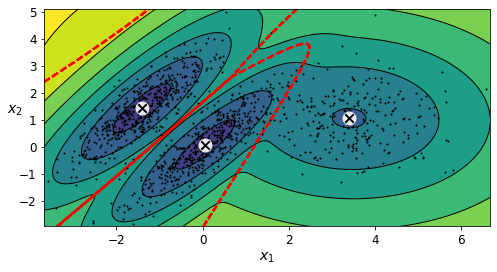

In [164]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

In [165]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [166]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

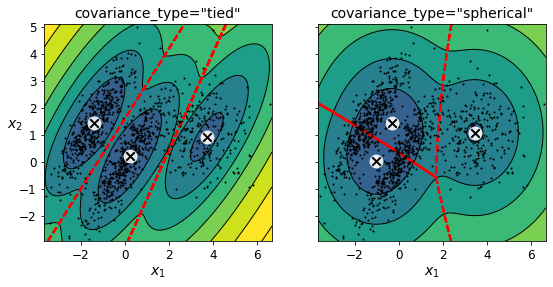

In [167]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

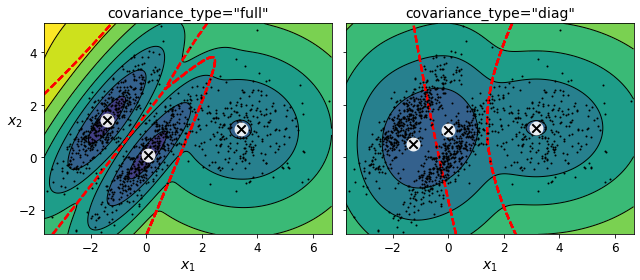

In [168]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## 가우시안 혼합을 사용한 이상치 탐지
가우시안 혼합을 이상치 탐지 에 사용할 수 있습니다: 밀도가 낮은 지역에 있는 샘플을 이상치로 생각할 수 있습니다. 사용할 밀도 임곗값을 결정해야 합니다. 예를 들어 한 제조 회사에서 결함 제품을 감지하려고 합니다. 결함 제품의 비율은 잘 알려져 있습니다. 이 비율이 4%라고 하면 밀도 임곗값을 이 값으로 지정하여 임계 밀도보다 낮은 지역에 있는 샘플을 얻을 수 있습니다:

In [169]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

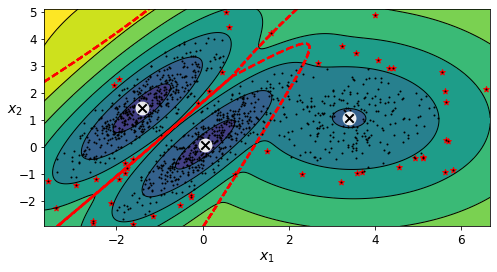

In [170]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

**TIP_** 가우시안 혼합 모델은 이상치를 포함해 모든 데이터에 맞추려고 한다. 따라서 이상치가 너무 많으면 모델이 정상치를 바라보는 시각이 편향되고 일부 이상치를 정상으로 잘못 생각할 수 있다. 이런 일이 일어나면 먼저 한 모델을 훈련하고 가장 크게 벗어난 이상치를 제거한다. 그 다음 정제된 데이터셋에 모델을 다시 훈련한다. 또 다른 방법은 안정적인 공분산 추정 방법을 사용하는 것이다.

### 모델 선택

이너셔나 실루엣 점수는 모두 원형 클러스터를 가정하기 때문에 가우시안 혼합 모델에 사용할 수 없습니다. 대신 BIC(Bayesian Information Criterion)나 AIC(Akaike Information Criterion) 같은 이론적 정보 기준을 최소화하는 모델을 찾을 수 있습니다.  
BIC와 AIC 모두 모델이 많은 파라미터(예를 들면 많은 클러스터)를 학습하지 못하도록 제한합니다. 그리고 데이터에 잘 맞는 모델(즉, 관측 데이터에 가능도가 높은 모델)에 보상을 줍니다.


In [172]:
gm.bic(X)

8189.733705221635

In [173]:
gm.aic(X)

8102.508425106597

In [177]:
# 수동 계산 코드
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [178]:
bic, aic

(8189.733705221635, 8102.508425106597)

In [179]:
n_params

17

In [180]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [181]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

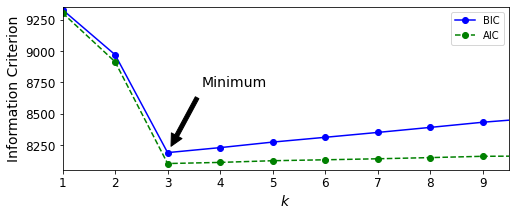

In [182]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [183]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [184]:
best_k

3

In [185]:
best_covariance_type

'full'

## 베이즈 가우시안 혼합 모델
최적의 클러스터 개수를 수동으로 찾는 대신 BayesianGaussianMixture 클래스를 사용해 불필요한 클러스터의 가중치를 0으로 (또는 0에 가깝게) 만들 수 있습니다. 최적의 클러스터 개수보다 큰 컴포넌트의 개수를 지정하면 됩니다. 이 알고리즘은 자동으로 불필요한 클러스터를 제거합니다:

In [186]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

알고리즘이 자동으로 3개의 클러스터가 필요하다는 것을 감지했다.

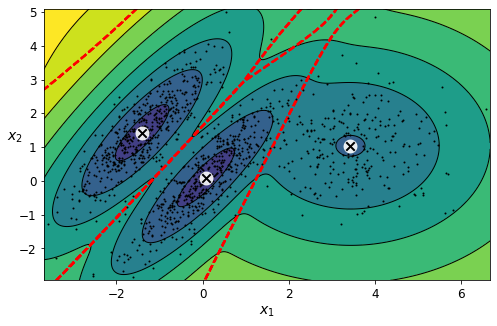

In [187]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [188]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [189]:
np.round(bgm_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [190]:
np.round(bgm_high.weights_, 2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

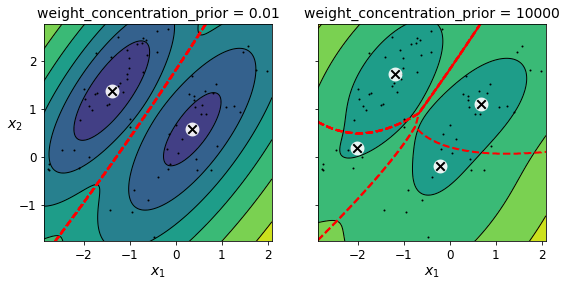

In [191]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

In [192]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [193]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

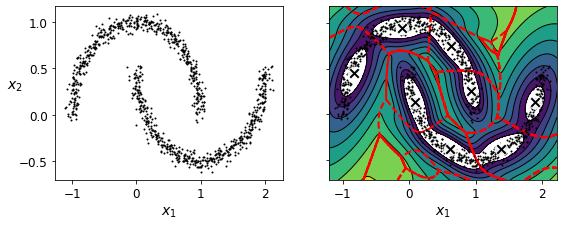

In [194]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

이런 좋지 않군요. 반달 모양 클러스터 2개를 감지하는 대신 이 알고리즘은 8개의 타원 클러스터를 감지했습니다. 하지만 밀도 그래프는 그렇게 나쁘지 않기 때문에 이상치 탐지에 사용할 수 있습니다.

# 연습문제

1. 군집을 어떻게 정의할 수 있나요? 몇 개의 군집 알고리즘을 말해보세요.

머신러닝에서 군집은 비슷한 샘플을 모으는 비지도 작업니다.  
유사도 개념은 주어진 문제에 따라 다르다.  
예를들어 어떤 경우에는 가까이 있는 두 샘플이 비슷하다고 생각할 수 있지만 다른 경우에는 조밀하게 모여 있는 그룹에 같이 속해 있는 한 멀리 떨어진 샘플도 비슷하다고 볼 수 있다.  
k-평균, DBSCAN, 병합 군집, BIRCH, 평균-이동, 유사도 전파, 스펙트럼 군집 등이 인기가 많은 군집 알고리즘이다

2. 군집 알고리즘의 주요 애플리케이션은 무엇인가요?

군집 알고리즘의 주요 애플리케이션은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소, 이상치 탐지, 특이치 탐지 등입니다.

3. k-평균을 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법을 설명하세요.

k-평균을 사용할 때 클러스터 개수를 선택하는 간단한 방법은 엘보 규칙이다.  
클러스터 개수의 함수로 이너셔(각 샘플과 인접한 센트로이드 사이의 평균 제곱거리)를 그리고 그래프에서 이너셔가 더는 빠르게 감소 하지 않는 지점(엘보)을 찾는다.  
일반적으로 이 지점이 최적의 클러스터 개수에 가깝다.  
다른 방법으로는 클러스터 개수의함수로 실루엣 점수를 그래프로 그린다.  
그래프에 뾰족하게 올라간 지점이 나타나는 경우가 많은데 일반적으로 이 근처가 최적의 클러스터 개수이다.  
실루엣 점수는 모든 샘플에 대한 평균 실루엣 계수이다.  
 샘플이 자신의 클러스터 안에 있고 다른 클러스터와 멀리 떨어져 있다면 +1에 가깝고 다른 클러스에 매우 인접해 있으면 -1에 가까워진다.  
 실루엣 다어이그램을 그려 좀 더 많은 분석을 수행할 수 있다.  

4. 전파는 무엇인가요? 왜 이를 구현해야 하고 어떻게 구현할 수 있나요?

데이터셋에 레이블을 부여하는 것은 비용과 시간이 많이 든다.  
따라서 보통 레이블이 없는 샘플은 많고 레이블이 있는 샘플은 적다.  
레이블 전파는 레이블이 있는 샘플의 일부(또는 전부)를 레이블이 없는 비슷한 샘플에 복사하는 기법이다.  
레이블을 가진샘플의 개수를 크게 늘릴 수 있고 지도 학습 방법을 사용해 더 나은 성능을 낼 수 있다.(이것이 준지도 학습 방법이다)  
이를 구현하는 한 가지 방법은 k-평균과 같은 군집 알고리즘을 모든 샘플에 적용한 다음 군집마다 가장 많은 레이블이나 가장 대표적인 샘플(센트로이드에 가장 가까운 샘플)을 찾아 동일 클러스터 안에 있는 레이블이 없는 샘플에 전파하는 것이다.

5. 데이터셋으로 확장할 수 있는 군집 알고리즘 두 개를 말해보세요. 밀도가 높은 지역을 찾는 군집 알고리즘 두 개는 무엇인가요?

k-평균과 BIRCH를 대규모 데이터셋에 적용할 수 있다.
DBSCAN과 평균-이동이 밀도가 높은 지역을 찾는다.

6. 학습이 유용한 경우는 언제인가요? 어떻게 구현할 수 있나요?

레이블이 없는 샘플이 많고 레이블을 부여하는 것에 비용이 많이 들 때는 능동학습이 유용하다.  
이런 (매우 흔한) 경우에는 무작위로 샘플을 선택해 레이블을 부여하는 것보다 능동학습이 더 바람직하다.  
전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청하는 특정 샘플에 레이블을 제공한다.  
널리 사용되는 것은 불확실성 샘플링이다.

7. 이상치 탐지와 정상치 탐지의 차이는 무엇인가요?

이상치 탐지는 이상치가 포함될 수 있는 데이터셋에서 알고리즘을 훈련한다.  
이상치 탐지의 목표는 전형적으로(훈련 세트 안에 있는)이상치와 새로운 샘플 사이에 있는 이상치를 구별해내는 것이다.  
특이치 탐지에서는 '깨끗'하다고 가정한 데이터셋에서 알고리즘을 훈련한다.  
이 알고리즘의 목적은 새로운 샘플 사이에서 특이한 것을 감지하는 것이다.  
어떤 알고리즘(예를 들어 아이솔레이션 포레스트)은 이상치 탐지에 최적인 반면 다른 알고리즘(예를들어 one-class SVM)은 특이치 탐지에 잘 맞다  

8. 가우시안 혼합이 무엇인가요? 어떤 작업에 사용할 수 있나요?

가우시안 혼합 모델(GMM)은 샘플이 파라미터를 모르는 몇 개의 가우시안 분포에서 생성되었다고 가정하는 확률 모델이다.  
다른 말로 하면 데이터가 유한한 개수의 타원 모양 클러스터로 그룹지어 있다는 가정이다.(클러스터의 타원 모양, 크기, 방향, 밀집도는 다를 수 있다.)  
하지만 샘플이 어떤 클러스터에 속해 있는지는 알지 못한다.  
밀집도 추정, 군집, 이상치 탐지에 이 모델을 사용할 수 있다.

9. 가우시안 혼합 모델을 사용할 때 적절한 클러스터 개수를 찾는 두 가지 기법을 말해보세요.

가우시안 혼합모델을 사용할때 적절한 클러스터 개수를 찾는 한가지 방법은 클러스터의 개수의 함수로 BIC나 AIC그래프를 그리는 것이다.  
그다음 BIC나 AIC를 최소화하는 클러스터 개수를 선택한다.  
또 다른 방법은 베이즈 가우시안 혼합 모델을 사용해 클러스터 개수를 자동으로 선택하는 것이다.  

10. 전통적인 올리베티 Olivetti 얼굴 데이터셋은 64×64 픽셀 크기의 흑백 얼굴 이미지 400개를 담고 있습니다. 각 이미지는 4,096 크기의 1D 벡터로 펼쳐져 있습니다. 사람 40명의 사진을 10장씩 찍은 것입니다. 어떤 사람의 사진인지 예측하는 모델을 훈련하는 것이 일반적입니다. sklearn.datasets.fetch_olivetti_faces() 함수를 사용해 데이터셋을 불러오세요

In [197]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\hoseop\scikit_learn_data


In [198]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [199]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

훈련 세트, 검증 세트, 테스트 세트로 나눕니다(이 데이터셋은 이미 0에서 1 사이로 스케일이 조정되어 있습니다). 이 데이터셋은 매우 작으니 계층적 샘플링을 사용해각 세트에 동일한 사람의 얼굴이 고루 섞이도록 하는 것이 좋습니다.

In [200]:
# 데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나눕니다
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [201]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


속도를 높이기 위해 PCA로 데이터의 차원을 줄입니다

In [202]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

그다음 k-평균을 사용해 이미지를 군집해보세요. (이 장에서 소개한 기법 중 하나를 사용해) 적절한 클러 스터 개수를 찾아보세요. 

In [203]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


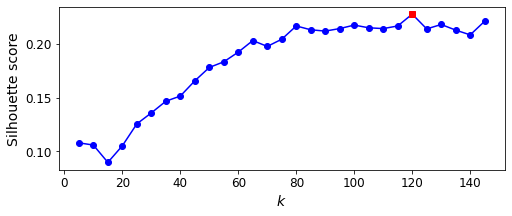

In [204]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [205]:
best_k

120

최적의 클러스터 개수는 120개로 매우 큽니다. 사진 속의 인물이 40명이기 때문에 아마 40 정도로 예상했을 것입니다. 하지만 같은 사람이 사진마다 다르게 보일 수 있습니다(예를 들어, 안경 착용 유무나 서 있는 방향이 다를 수 있습니다).

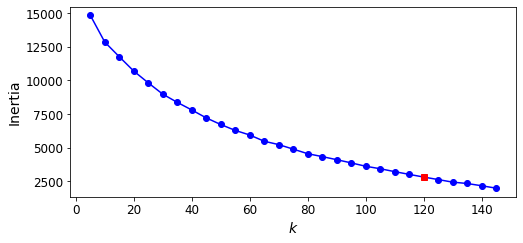

In [206]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

이너셔 그래프에서는 엘보우 지점이 없기 때문에 최적의 클러스터 개수가 명확하지 않습니다. 그냥 k=120을 사용하겠습니다.

In [207]:
best_model = kmeans_per_k[best_index]

클러스터를 시각화해보세요. 각 클러스터에 비슷한 얼굴이 들어 있나요?

Cluster 0


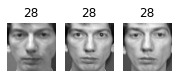

Cluster 1


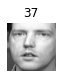

Cluster 2


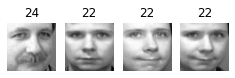

Cluster 3


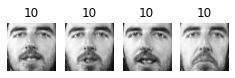

Cluster 4


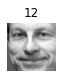

Cluster 5


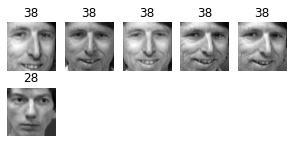

Cluster 6


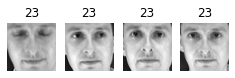

Cluster 7


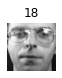

Cluster 8


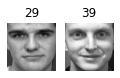

Cluster 9


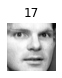

Cluster 10


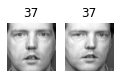

Cluster 11


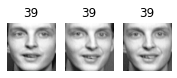

Cluster 12


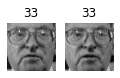

Cluster 13


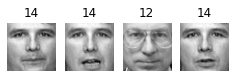

Cluster 14


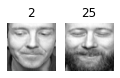

Cluster 15


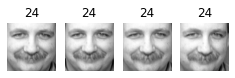

Cluster 16


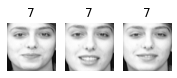

Cluster 17


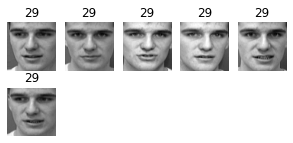

Cluster 18


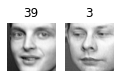

Cluster 19


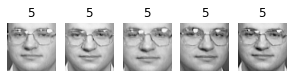

Cluster 20


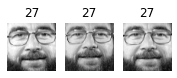

Cluster 21


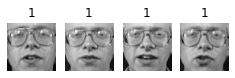

Cluster 22


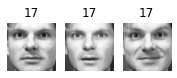

Cluster 23


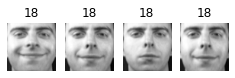

Cluster 24


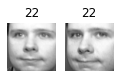

Cluster 25


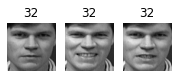

Cluster 26


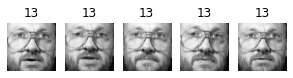

Cluster 27


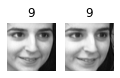

Cluster 28


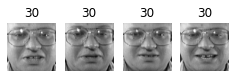

Cluster 29


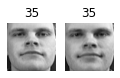

Cluster 30


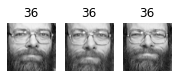

Cluster 31


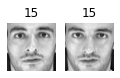

Cluster 32


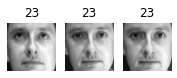

Cluster 33


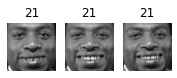

Cluster 34


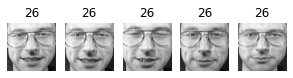

Cluster 35


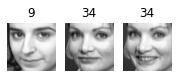

Cluster 36


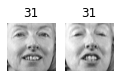

Cluster 37


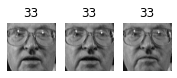

Cluster 38


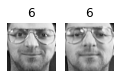

Cluster 39


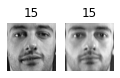

Cluster 40


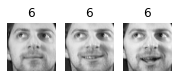

Cluster 41


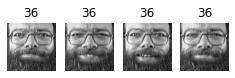

Cluster 42


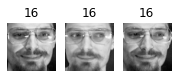

Cluster 43


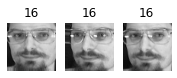

Cluster 44


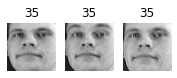

Cluster 45


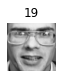

Cluster 46


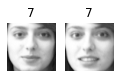

Cluster 47


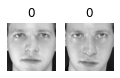

Cluster 48


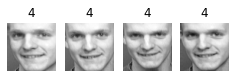

Cluster 49


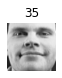

Cluster 50


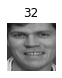

Cluster 51


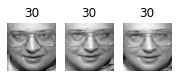

Cluster 52


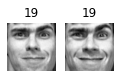

Cluster 53


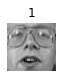

Cluster 54


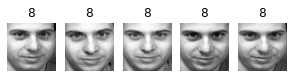

Cluster 55


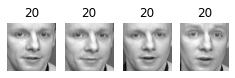

Cluster 56


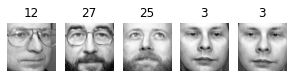

Cluster 57


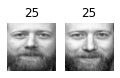

Cluster 58


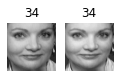

Cluster 59


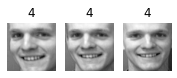

Cluster 60


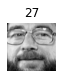

Cluster 61


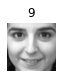

Cluster 62


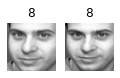

Cluster 63


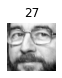

Cluster 64


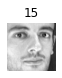

Cluster 65


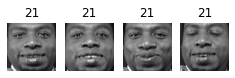

Cluster 66


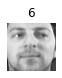

Cluster 67


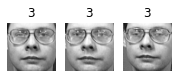

Cluster 68


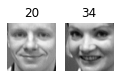

Cluster 69


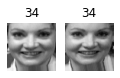

Cluster 70


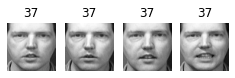

Cluster 71


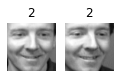

Cluster 72


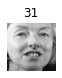

Cluster 73


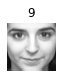

Cluster 74


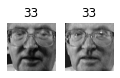

Cluster 75


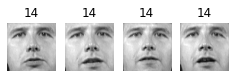

Cluster 76


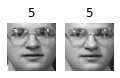

Cluster 77


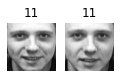

Cluster 78


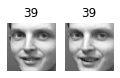

Cluster 79


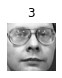

Cluster 80


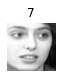

Cluster 81


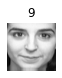

Cluster 82


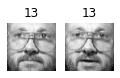

Cluster 83


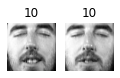

Cluster 84


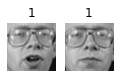

Cluster 85


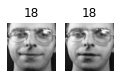

Cluster 86


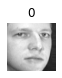

Cluster 87


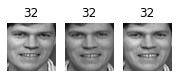

Cluster 88


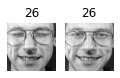

Cluster 89


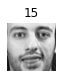

Cluster 90


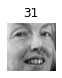

Cluster 91


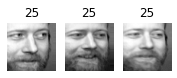

Cluster 92


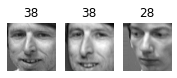

Cluster 93


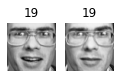

Cluster 94


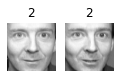

Cluster 95


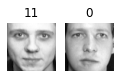

Cluster 96


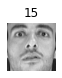

Cluster 97


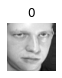

Cluster 98


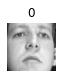

Cluster 99


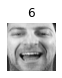

Cluster 100


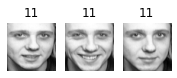

Cluster 101


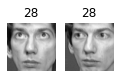

Cluster 102


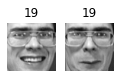

Cluster 103


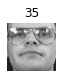

Cluster 104


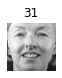

Cluster 105


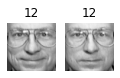

Cluster 106


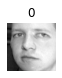

Cluster 107


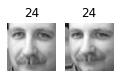

Cluster 108


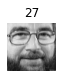

Cluster 109


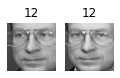

Cluster 110


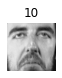

Cluster 111


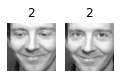

Cluster 112


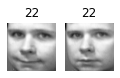

Cluster 113


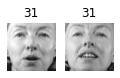

Cluster 114


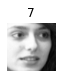

Cluster 115


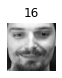

Cluster 116


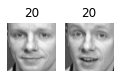

Cluster 117


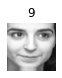

Cluster 118


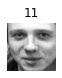

Cluster 119


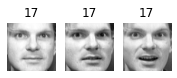

In [208]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

약 2/3 정도가 쓸모있어 보입니다. 즉 적어도 2개의 사진을 가지고 있고 모두 동일한 사람입니다. 하지만 나머지 클러스터는 다른 사람 얼굴이 하나 이상 있거나 하나의 사진만 가지고 있습니다.

이런 방식으로 군집된 이미지는 부정확해서 (아래에서 보겠지만) 모델을 훈련할 때 바로 사용하기 어렵습니다. 하지만 새로운 데이터셋에 이미지를 레이블링할 때는 매우 유용할 수 있습니다. 일반적으로 훨씬 빠르게 레이블을 부여할 수 있습니다.

11. 올리베티 얼굴 데이터셋으로 계속해보겠습니다. 사진에 나타난 사람을 예측하는 분류기를 훈련하고 검증 세트에서 평가해보세요.

In [209]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9

그다음 k-평균을 차원 축소 도구로 사용하여 축소된 세트에서 분류기를 훈련해보세요.

In [210]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.7

전혀 좋아지지 않았군요! 클러스터 개수를 튜닝하면 도움이 되는지 알아 보죠.

분류기 성능을 최대로 만드는 클러스터 개수를 찾아보세요. 얼마나 성능이 나오나요?

앞에서 처럼 GridSearchCV를 사용할 수 있습니다. 하지만 검증 세트가 이미 있기 때문에 K-폴드 교차 검증을 할 필요가 없고 하나의 하이퍼파라미터만 탐색하기 때문에 간단히 직접 반복문을 만들겠습니다:

In [211]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.575
15 0.6
20 0.6625
25 0.6625
30 0.6625
35 0.675
40 0.75
45 0.7375
50 0.725
55 0.7125
60 0.7125
65 0.7375
70 0.75
75 0.7375
80 0.7875
85 0.7625
90 0.75
95 0.7125
100 0.775
105 0.725
110 0.725
115 0.7625
120 0.7
125 0.75
130 0.725
135 0.75
140 0.7625
145 0.6875


클러스터 개수를 튜닝해도 80% 정확도를 넘지 못하는군요. 클러스터 센트로이드까지 거리는 원본 이미지만큼 유용하지 않은 것 같습니다.

축소된 세트에서 추출한 특성을 원본 특성에 추가하면 어떤가요? (여기에서도 최선의 클러스터 개수를 찾아보세요.)

In [212]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [214]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8125

조금 나아졌네요. 하지만 클러스터 특성이 없는 것이 차라리 낫습니다. 이 경우 클러스터는 분류기를 직접 훈련하는데 도움이 되지 않습니다(하지만 새로운 훈련 샘플을 레이블링하는데는 여전히 도움이 될 수 있습니다).

12. 올리베티 얼굴 데이터셋에서 가우시안 혼합 모델을 훈련해보세요. 알고리즘의 속도를 높이기 위해 데이터셋의 차원을 감소시켜야 할 것입니다(예를 들면 분산의 99%를 유지하면서 PCA를 사용합니다).

In [215]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

이 모델을 사용해 (`sample()` 메서드로) 새로운 얼굴을 생성하고 시각화해보세요(PCA를 사용했다면 `inverse_transform()` 메서드를 사용해야 합니다).

In [216]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

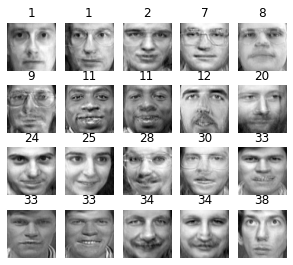

In [217]:
plot_faces(gen_faces, y_gen_faces)

일부 이미지를 수정해보세요(예를 들면 회전, 뒤집기, 어둡게 하기). 모델이 이상치를 감지하는지 확인해보세요(즉 정상 샘플과 이상치에 대해 `score_samples()` 메서드 출력을 비교해보세요).

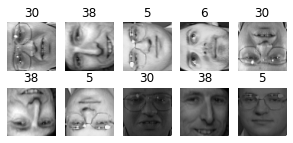

In [218]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [219]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [220]:
gm.score_samples(X_bad_faces_pca)

array([-2.43643067e+07, -1.89785016e+07, -3.78112467e+07, -4.98187701e+07,
       -3.20479204e+07, -1.37531001e+07, -2.92374076e+07, -1.05488997e+08,
       -1.19575244e+08, -6.74256691e+07])


잘못된 사진은 이 가우시안 혼합 모델에서 등장할 가능성이 매우 낮습니다. 다른 훈련 샘플의 점수와 비교해 보세요:

In [222]:
gm.score_samples(X_train_pca[:10])

array([1163.02020965, 1134.03637883, 1156.32132911, 1170.67602774,
       1141.45404927, 1154.35205155, 1091.32894807, 1111.41149553,
       1096.43049159, 1132.98982642])

13. 일부 차원 축소 기법은 이상치 탐지를 위해서 사용할 수도 있습니다. 예를 들어 올리베티 얼굴 데이터셋을 PCA를 사용해 분산의 99% 유지하도록 축소해보세요. 그다음 각 이미지의 재구성 오차를 계산합니다. 그다음 이전 연습문제에서 만든 수정된 이미지를 선택해 재구성 오차를 확인해보세요. 재구성 오차가 얼마나 커지는지 확인하세요. 재구성 이미지를 출력해보면 이유를 알 수 있습니다. 정상 얼굴을 재구성하기 때문입니다.

In [223]:
# 이미 PCA를 사용해 축소된 데이터셋을 가지고 있습니다:
X_train_pca

array([[ 3.78080034e+00, -1.85478818e+00, -5.14404154e+00, ...,
        -1.35631114e-01, -2.14092880e-01,  6.11948408e-02],
       [ 1.01488695e+01, -1.52754307e+00, -7.66985714e-01, ...,
         1.23932235e-01, -1.35258496e-01, -2.32765935e-02],
       [-1.00152903e+01,  2.87728143e+00, -9.19877887e-01, ...,
         7.26134256e-02, -2.96473922e-03,  1.24893673e-01],
       ...,
       [ 2.47587609e+00,  2.95596957e+00,  1.29985535e+00, ...,
        -2.09122319e-02,  3.48486565e-02, -1.54320896e-01],
       [-3.22031474e+00,  5.34898424e+00,  1.39426899e+00, ...,
         5.75515851e-02, -2.28309244e-01,  1.55576527e-01],
       [-9.22877848e-01, -3.64702630e+00,  2.26087713e+00, ...,
         1.36853293e-01, -6.91294596e-02,  6.26766384e-02]], dtype=float32)

In [224]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [225]:
reconstruction_errors(pca, X_train).mean()

0.0001920535

In [226]:
reconstruction_errors(pca, X_bad_faces).mean()

0.004707354

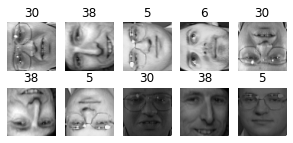

In [227]:
plot_faces(X_bad_faces, y_bad)

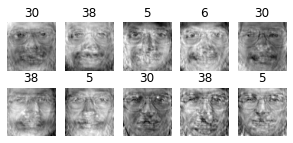

In [228]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)